# Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importando e customizando o *seaborn*

In [ ]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Importando e visualizando os dados

In [ ]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

In [ ]:
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


# Análise para o estado do Rio Grande do Sul

In [ ]:
dados_rs = dados.query("SG_UF_RESIDENCIA == 'RS'")

## Análise das notas das provas

In [ ]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']

### Distribuição das notas de acordo com a renda familiar

In [ ]:
def ordena_renda(dataset):
  renda_ordenada = dataset['Q006'].unique()
  renda_ordenada.sort()

In [ ]:
ordena_renda(dados_rs)

In [ ]:
dados_rs['NU_NOTA_TOTAL'] = dados_rs[provas].sum(axis = 1) #Nota total das provas
dados_nao_nulos_rs = dados_rs.query('NU_NOTA_TOTAL != 0') #Eliminação de valores nulos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def plota_boxplot(x, y, xlabel, title, dataset):
  ax = plt.figure(figsize = (18, 5))
  ax = sns.boxplot(x = x, y = y, data = dataset, order = renda_ordenada)

  ax.set_title(title, fontsize = 16, loc = 'left', y = 1.03)
  ax.set_xlabel(xlabel, fontsize = 14, labelpad = 15)
  ax.set_ylabel('')
  ax = ax

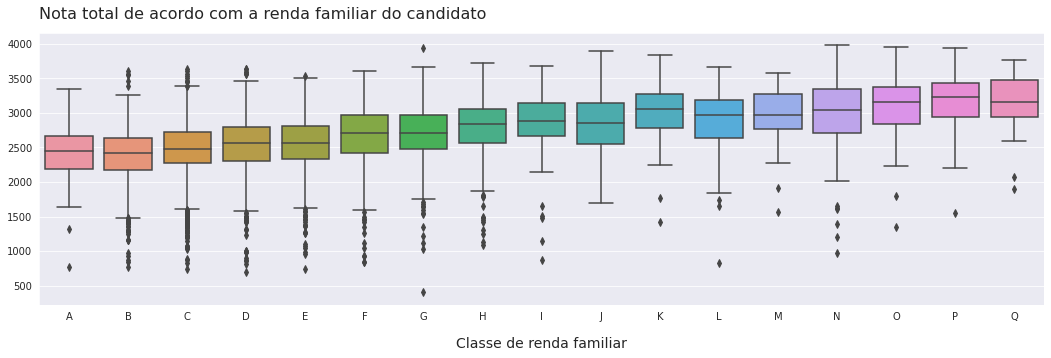

In [ ]:
plota_boxplot('Q006', 'NU_NOTA_TOTAL', 'Classe de renda familiar', 
              'Nota total de acordo com a renda familiar do candidato',
              dados_nao_nulos_rs)

### Distribuição das notas de acordo com o tipo de escola e a cor/raça

In [ ]:
selecao = (dados_nao_nulos_rs['TP_ESCOLA'] != 1) & (dados_nao_nulos_rs['TP_COR_RACA'] != 0)
dados_escola_rs = dados_nao_nulos_rs[selecao]

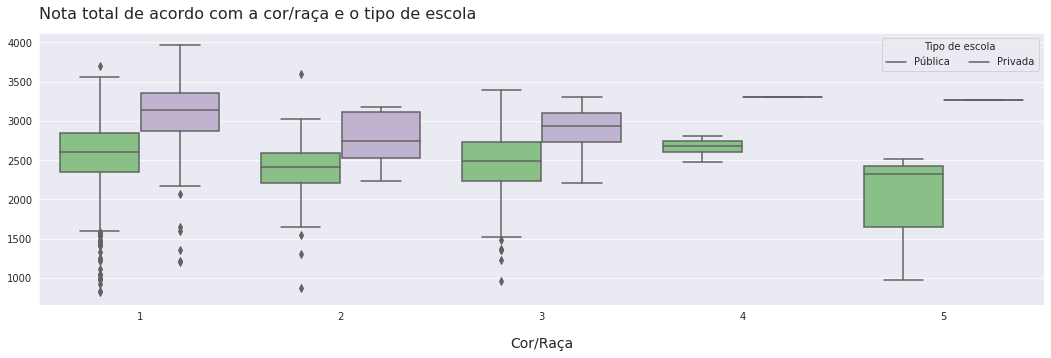

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.boxplot(x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', data = dados_escola_rs, hue = 'TP_ESCOLA')

ax.set_title('Nota total de acordo com a cor/raça e o tipo de escola', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Cor/Raça', fontsize = 14, labelpad = 15)
ax.set_ylabel('')

ax.legend(['Pública', 'Privada'], loc = 'best', title = 'Tipo de escola', ncol = 2)

ax = ax

## Alunos pretos ou pardos em escolas privadas

In [ ]:
selecao = (dados_nao_nulos_rs['TP_ESCOLA'] == 3) & ((dados_nao_nulos_rs['TP_COR_RACA'] == 2) | (dados_nao_nulos_rs['TP_COR_RACA'] == 3))

dados_renda_rs = dados_nao_nulos_rs[selecao]
print(f'{dados_renda_rs.shape[0]} alunos pretos ou pardos estudam em escola privada')

percentual = (dados_renda_rs.shape[0] / dados_nao_nulos_rs.query('TP_ESCOLA == 3').shape[0] * 100)
print(f'{percentual}% dos alunos de escolas privadas são pretos ou pardos')

23 alunos pretos ou pardos estudam em escola privada
10.952380952380953% dos alunos de escolas privadas são pretos ou pardos


In [ ]:
selecao = (dados_nao_nulos_rs['TP_COR_RACA'] == 2) | (dados_nao_nulos_rs['TP_COR_RACA'] == 3)
percentual = (dados_renda_rs.shape[0] / dados_nao_nulos_rs[selecao].shape[0] * 100)
print(f'{percentual}% dos alunos pretos ou pardos estudam em escola privada')

2.952503209242619% dos alunos pretos ou pardos estudam em escola privada


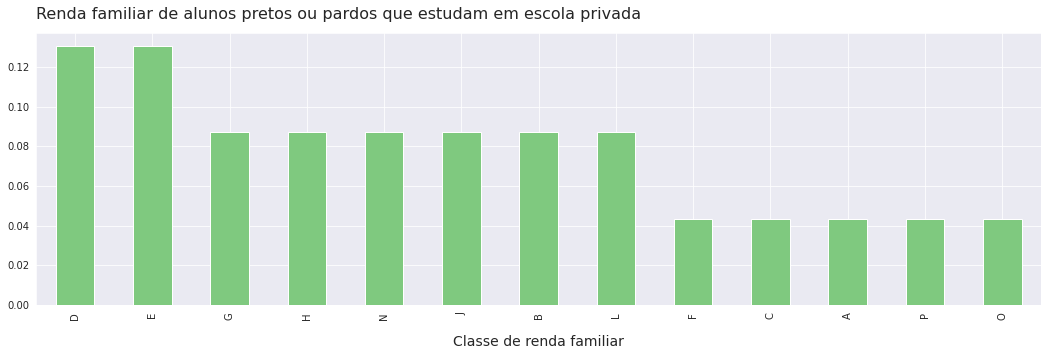

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = dados_renda_rs['Q006'].value_counts(normalize = True).plot(kind = 'bar')

ax.set_title('Renda familiar de alunos pretos ou pardos que estudam em escola privada', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')

ax = ax

# Análise para todo o Brasil

## Análise das notas das provas

In [ ]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']

### Distribuição das notas de acordo com a renda familiar

In [ ]:
ordena_renda(dados)

In [ ]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis = 1) #Nota total das provas

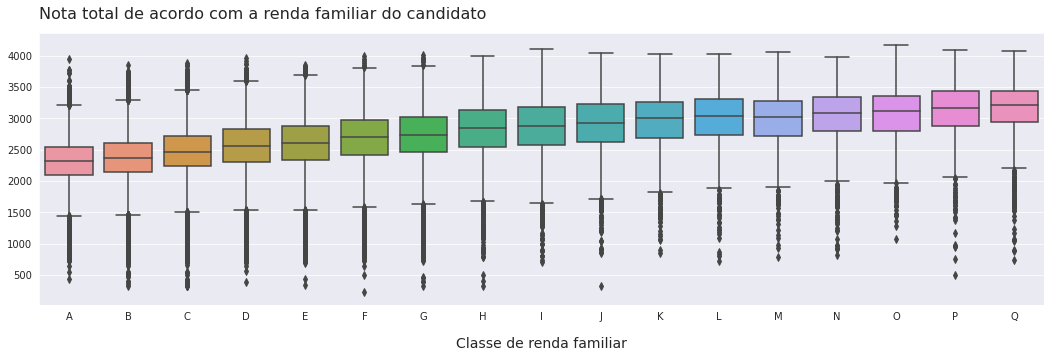

In [ ]:
plota_boxplot('Q006', 'NU_NOTA_TOTAL', 'Classe de renda familiar', 
              'Nota total de acordo com a renda familiar do candidato',
              dados_nao_nulos)

In [ ]:
ax.figure.savefig("Nota total de acordo com a renda familiar - BR.png", dpi = 600, bbox_inches = 'tight')

### Distribuição das notas de acordo com o tipo de escola e a cor/raça

In [ ]:
selecao = (dados_nao_nulos['TP_ESCOLA'] != 1) & (dados_nao_nulos['TP_COR_RACA'] != 0)
dados_escola = dados_nao_nulos[selecao]

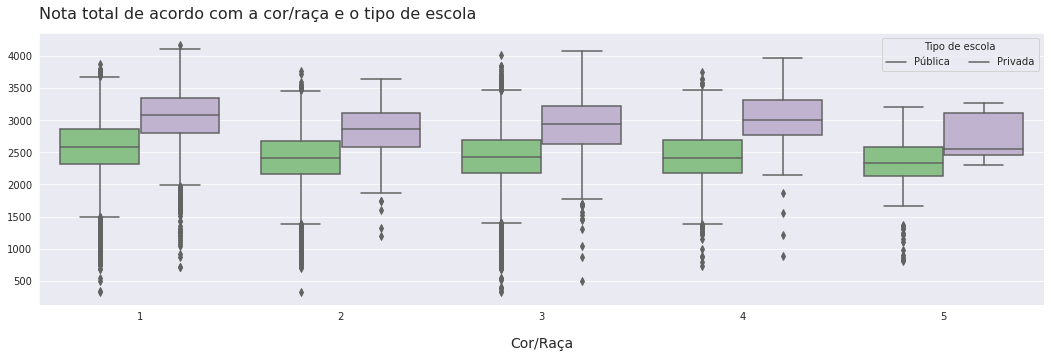

In [ ]:
ax = plt.figure(figsize = (18,5))
ax = sns.boxplot(x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', data = dados_escola, hue = 'TP_ESCOLA')

ax.set_title('Nota total de acordo com a cor/raça e o tipo de escola', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Cor/Raça', fontsize = 14, labelpad = 15)
ax.set_ylabel('')

ax.legend(['Pública', 'Privada'], loc = 'best', title = 'Tipo de escola', ncol = 2)

ax = ax

In [ ]:
ax.figure.savefig("Nota total de acordo com a cor.png", dpi = 600, bbox_inches = 'tight')

## Alunos pretos ou pardos em escolas privadas

In [ ]:
selecao = (dados_nao_nulos['TP_ESCOLA'] == 3) & ((dados_nao_nulos['TP_COR_RACA'] == 2) | (dados_nao_nulos['TP_COR_RACA'] == 3))

dados_renda = dados_nao_nulos[selecao]
print(f'{dados_renda.shape[0]} alunos pretos ou pardos estudam em escola privada')

percentual = (dados_renda.shape[0] / dados_nao_nulos.query('TP_ESCOLA == 3').shape[0] * 100)
print(f'{percentual}% dos alunos de escolas privadas são pretos ou pardos')

1703 alunos pretos ou pardos estudam em escola privada
32.035364936042136% dos alunos de escolas privadas são pretos ou pardos


In [ ]:
selecao = (dados_nao_nulos['TP_COR_RACA'] == 2) | (dados_nao_nulos['TP_COR_RACA'] == 3)
percentual = (dados_renda.shape[0] / dados_nao_nulos[selecao].shape[0] * 100)
print(f'{percentual}% dos alunos pretos ou pardos estudam em escola privada')

2.9837409769430234% dos alunos pretos ou pardos estudam em escola privada


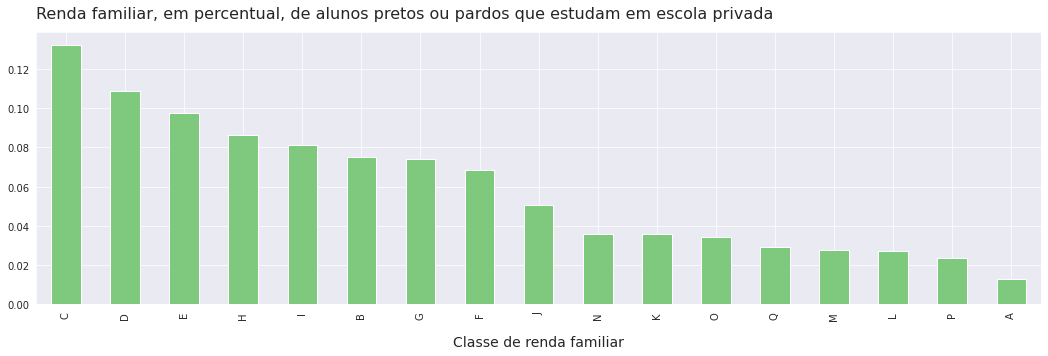

In [ ]:
ax = plt.figure(figsize = (18, 5))
ax = dados_renda['Q006'].value_counts(normalize = True).plot(kind = 'bar')

ax.set_title('Renda familiar, em percentual, de alunos pretos ou pardos que estudam em escola privada', fontsize = 16, loc = 'left', y = 1.03)
ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax = ax


In [ ]:
ax.figure.savefig("Renda familiar de alunos pretos ou pardos.png", dpi = 600, bbox_inches = 'tight')

## Análise comparativa

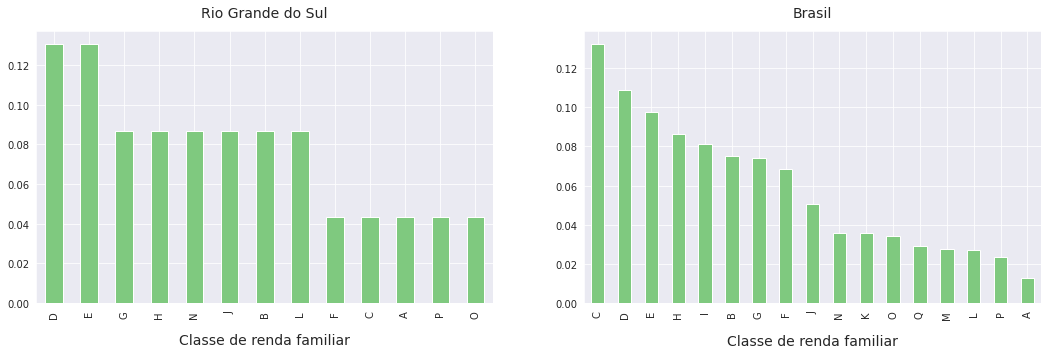

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = plt.subplot(1, 2, 1)
ax = dados_renda_rs['Q006'].value_counts(normalize = True).plot(kind = 'bar')

ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Rio Grande do Sul', fontsize = 14, loc = 'center', y = 1.03)

ax = plt.subplot(1, 2, 2)
ax = dados_renda['Q006'].value_counts(normalize = True).plot(kind = 'bar')

ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Brasil', fontsize = 14, loc = 'center', y = 1.03)

ax = ax

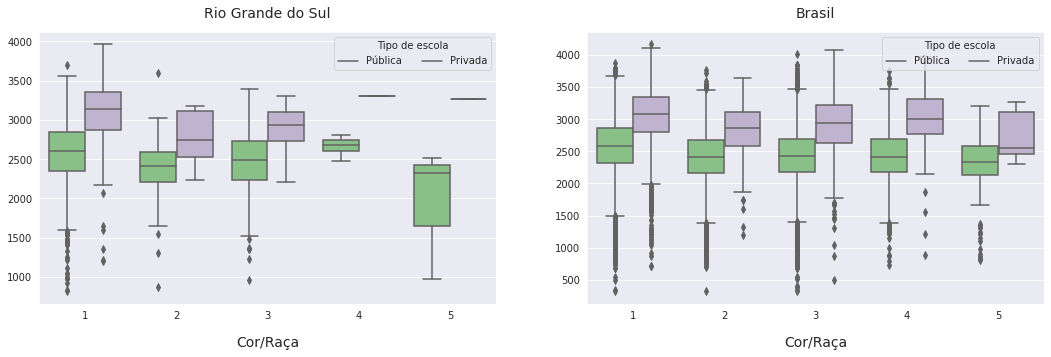

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = plt.subplot(1, 2, 1)
ax = sns.boxplot(x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', data = dados_escola_rs, hue = 'TP_ESCOLA')

ax.set_xlabel('Cor/Raça', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Rio Grande do Sul', fontsize = 14, loc = 'center', y = 1.03)

ax.legend(['Pública', 'Privada'], loc = 'best', title = 'Tipo de escola', ncol = 2)

ax = plt.subplot(1, 2, 2)
ax = sns.boxplot(x = 'TP_COR_RACA', y = 'NU_NOTA_TOTAL', data = dados_escola, hue = 'TP_ESCOLA')

ax.set_xlabel('Cor/Raça', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Brasil', fontsize = 14, loc = 'center', y = 1.03)

ax.legend(['Pública', 'Privada'], loc = 'upper right', title = 'Tipo de escola', ncol = 2)

ax = ax

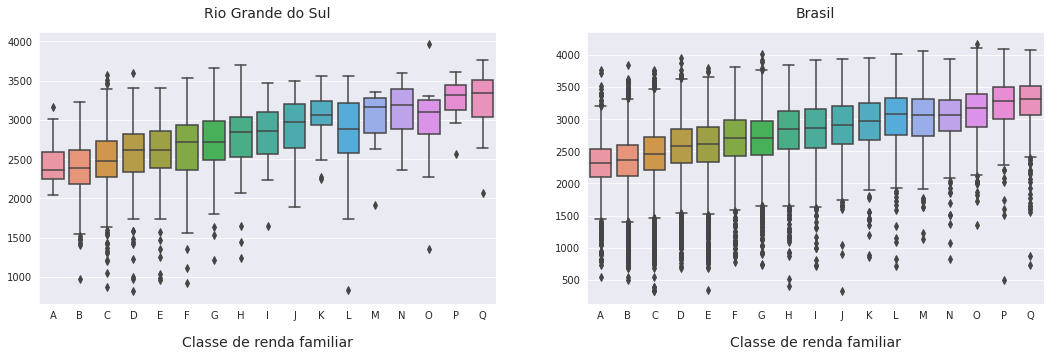

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = plt.subplot(1, 2, 1)
ax = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_escola_rs, order = renda_ordenada)

ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Rio Grande do Sul', fontsize = 14, loc = 'center', y = 1.03)

ax = plt.subplot(1, 2, 2)
x = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_escola, order = renda_ordenada)

ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Brasil', fontsize = 14, loc = 'center', y = 1.03)

ax = ax

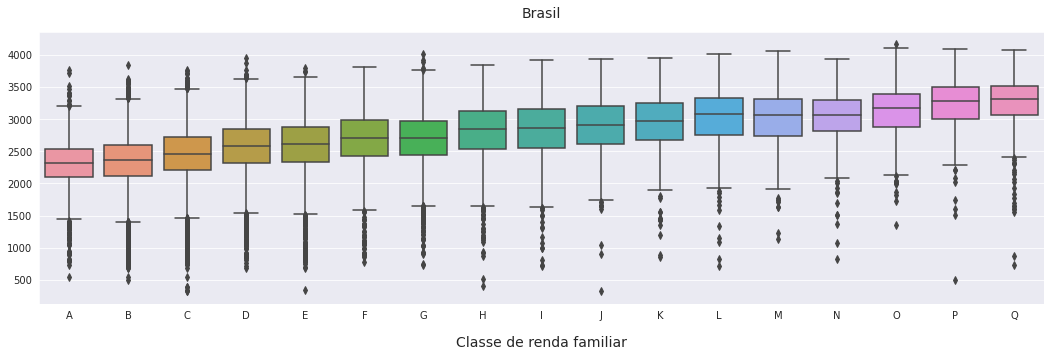

In [ ]:
ax = plt.figure(figsize = (18, 5))

ax = sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_escola, order = renda_ordenada)

ax.set_xlabel('Classe de renda familiar', fontsize = 14, labelpad = 15)
ax.set_ylabel('')
ax.set_title('Brasil', fontsize = 14, loc = 'center', y = 1.03)

ax = ax